<a href="https://colab.research.google.com/github/kharerahul002/Forecasting-Models/blob/master/AR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
import quandl

In [0]:
# Explore time series data
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
series = quandl.get('BSE/BOM500325') #reliance
series


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,115.0,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1991-01-03,107.5,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
1991-01-07,105.0,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
1991-01-09,105.0,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
1991-01-11,102.5,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,1451.4,1454.75,1391.95,1428.10,1421.15,1301548.0,49487.0,1.849695e+09,159436.0,12.25,62.80,-23.30
2020-04-29,1446.0,1453.05,1420.50,1426.20,1436.20,642967.0,25581.0,9.234291e+08,119218.0,18.54,32.55,-19.80
2020-04-30,1454.0,1494.50,1440.00,1467.05,1469.70,1277127.0,47637.0,1.876995e+09,199937.0,15.66,54.50,13.05


In [0]:
type(series)

pandas.core.frame.DataFrame

In [0]:
series = series['Open']
series


Date
1991-01-02     115.0
1991-01-03     107.5
1991-01-07     105.0
1991-01-09     105.0
1991-01-11     102.5
               ...  
2020-04-28    1451.4
2020-04-29    1446.0
2020-04-30    1454.0
2020-05-11    1582.0
2020-05-12    1578.0
Name: Open, Length: 7093, dtype: float64

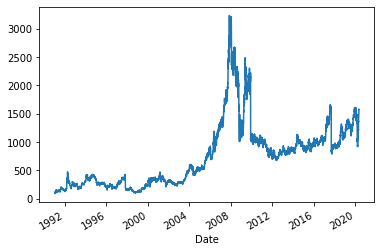

In [0]:
series.plot()
pyplot.show()

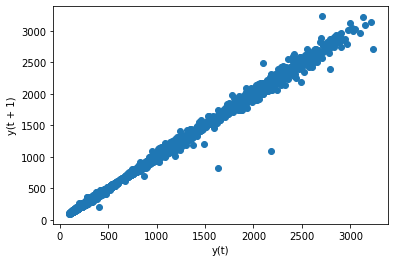

In [0]:
# Explore Correlation
lag_plot(series)
pyplot.show()

In [0]:
from pandas import Series
from pandas import DataFrame
from pandas import concat

In [0]:
# Make time series data (key:value structure) to 2-dimensional labeled data structure 
values = DataFrame(series.values) 

In [0]:
# Create lag column (t-p)
p = 30
dataframe = concat([values.shift(p), values], axis=1)
dataframe.columns = ['t-'+str(p), 't+'+str(p)] 

In [0]:
# Calculate correlation matrix 
result = dataframe.corr() 
print(result)

          t-30      t+30
t-30  1.000000  0.964315
t+30  0.964315  1.000000


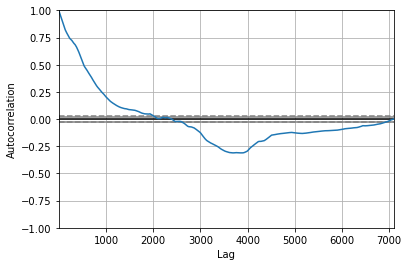

In [0]:
#===============AUTOCORRELATION PLOT==================
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

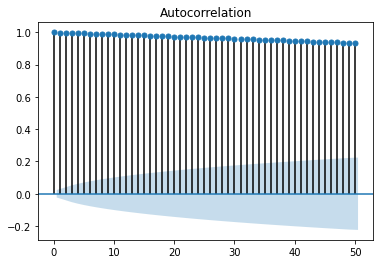

In [0]:
#===============ZOOM-IN TO PLOT==================
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=50) # vary lags for zoom-in or zoom-out
pyplot.show()

In [0]:
#================TRAIN MODEL TO FIT DATA (ROLLING MODEL)=====================
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
# Split dataset
test_length = 2500
X = series.values
train, test = X[1:len(X)-test_length], X[len(X)-test_length:]

In [0]:
# Train autoregression
model = AR(train)
model_fit = model.fit()
coef = model_fit.params # [b0 b1 ... bn]
window = model_fit.k_ar # best order 
print('Lag:', window)
print('Coefficients:', coef)

Lag: 31
Coefficients: [ 1.04167459e+00  9.38514940e-01 -1.08619381e-03 -1.91743828e-03
  8.40674932e-02 -1.02906107e-01  9.49554249e-02 -4.51593269e-03
  4.40815138e-02 -9.61481420e-02  5.69860446e-02 -1.66105253e-02
  5.45415705e-03  2.95447666e-02 -2.38896534e-02  5.39189914e-03
  3.50629138e-02 -2.60912690e-02 -5.03979074e-02 -9.75200241e-03
  3.30162180e-03  6.07061091e-02  2.53445313e-02 -7.25041240e-02
  5.00723532e-02 -2.86869875e-02  5.49774866e-02 -4.77110433e-02
  7.12614630e-04  9.69379738e-03 -1.68213797e-02 -1.16291459e-03]


In [0]:
# Walk forward over time steps in test
history = train[len(train)-window:] # row at len(train)-window at end 
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history) # 31
    lag = [history[i] for i in range(length-window,length)] # 1-31
    
    # create yhat
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=1101.261426, expected=1140.000000
predicted=1141.694705, expected=1128.000000
predicted=1124.493333, expected=1105.250000
predicted=1107.011327, expected=1108.000000
predicted=1110.787399, expected=1128.000000
predicted=1124.806906, expected=1137.000000
predicted=1136.435837, expected=1130.000000
predicted=1130.170181, expected=1067.050000
predicted=1070.203267, expected=1074.650000
predicted=1076.494517, expected=1072.000000
predicted=1077.048013, expected=1073.950000
predicted=1072.344839, expected=1059.700000
predicted=1067.865169, expected=1088.000000
predicted=1086.543073, expected=1091.300000
predicted=1092.037954, expected=1049.600000
predicted=1047.952618, expected=1045.000000
predicted=1054.957171, expected=1030.000000
predicted=1030.838524, expected=1040.000000
predicted=1039.040579, expected=1024.700000
predicted=1024.998933, expected=1008.000000
predicted=1010.976445, expected=1000.350000
predicted=1005.236466, expected=1019.950000
predicted=1017.977408, expected=

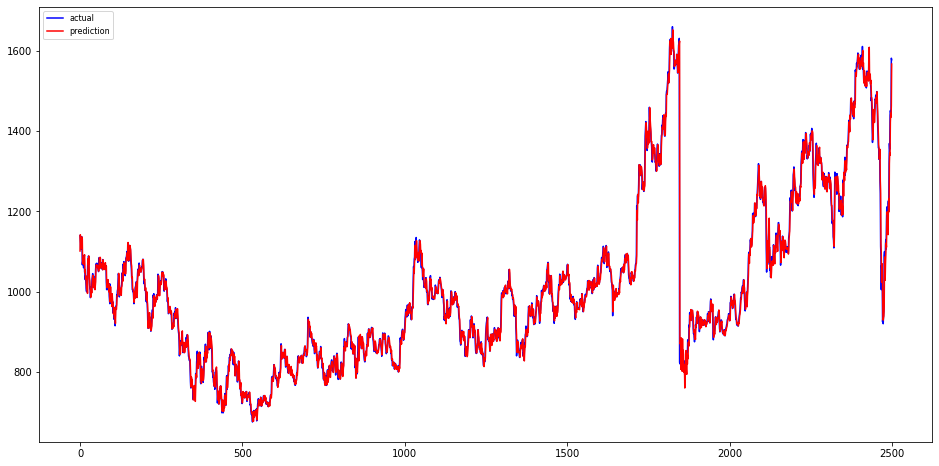

In [0]:
# Plot
plt.figure(figsize=(16,8))
plt.plot(test, color='blue', label='actual')
plt.plot(predictions, color='red', label='prediction')
plt.legend(loc='upper left', fontsize=8)
#plt.plot(figsize=(15, 8))
plt.show()